# Lecture 6

notes for the code: the file <font face="Courier">input.dat</font> contains, in order:
- an <font face="Courier">int</font>, the number of spins for the simulation;
- two <font face="Courier">double</font>, the coupling costant $J$, and the external field $h$;
- three <font face="Courier">double</font>, respectively the temperature step $dT$ and the limits $T_{min}$ and $T_{max}$; 
- an <font face="Courier">int</font>, which controls the algorithm used (if set 1 Metropolis is used, else Gibbs); 
- two <font face="Courier">int</font>, the number of block and their lenght.

The program run the chosen algorithm between $T_{min}$ and $T_{max}$ with step $dT$, performing an initial equilibration of 1000 steps for every temperature, and works with $k_B=\mu_B=1$. Move all the <font face="Courier">output.(quantity).0</font> in the corresponding algorithm folder. 

## Exercise 6: 1D Ising model

The Hamiltonian of the 1D Ising Model is:
$$H=- J\sum_{i=1}^N s_i s_{i+1} -\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) $$
with $J>0$ the coupling costant and $h$ the external field. We will use $PBC$, so $s_{N+1}=s_1$. The problem is exactly solvable: we compute the partition function
$$Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N$$

where$\lambda_{1,2} = e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, and, through its derivatives, we can obtain all the thermodynamic quantities of interest, i.e. internal energy $U$, heat capacity $C$, magnetization $M$ and magnetic susceptibility $\chi$. We want to compute these four quantities with a simulation, both with Metropolis and Gibbs algorithm, and compare the results with teoretical prediction. We have (the first formula is the teoretical prediction, the second one is simulated):

**Internal energy per spin** $\dfrac{U(N,T)}{N}= -\dfrac{1}{N}\dfrac{\partial \log Z}{\partial \beta}$

$$\frac{U(N,T)}{N} \underset{h=0}= -J \tanh(\beta J) \left( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \right)= \frac{<H>}{N}$$

**Heat capacity** $C(N,T)=\dfrac{\partial U}{\partial T}$

$$\dfrac{C(N,T)}{N} \underset{h=0}= k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} - N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}= k_B \beta^2 \frac{\sigma_H^2}{N}$$

**Magnetization** $M(N,T,h)=k_B T\dfrac{\partial \log Z}{\partial h}$

$$\frac{M(N,T,h)}{N} \underset{h \neq0}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \left[\lambda_1^{N-1}\cdot \left(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\right) + \lambda_2^{N-1}\cdot \left(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\right)\right]=\frac{\langle\sum_{i=1}^N s_i\rangle}{N}$$

**Magnetic susceptibility** $\chi(N,T)=\dfrac{\partial M}{\partial h}$

$$\chi(N,T) \underset{h=0}=\beta e^{2\beta J} \left( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \right)=\beta\langle\left( \sum_{i=1}^N s_i \right)^2\rangle$$

For this simulation we have: $N=50$, $J=1$, $T \in [0,5;2]$ and $dT=0,05$. Each temperature step consists in 20 blocks of $10^4$ steps. For $U$, $C$ and $\chi$ we have $h=0$, for $M$ $h=0,02$.

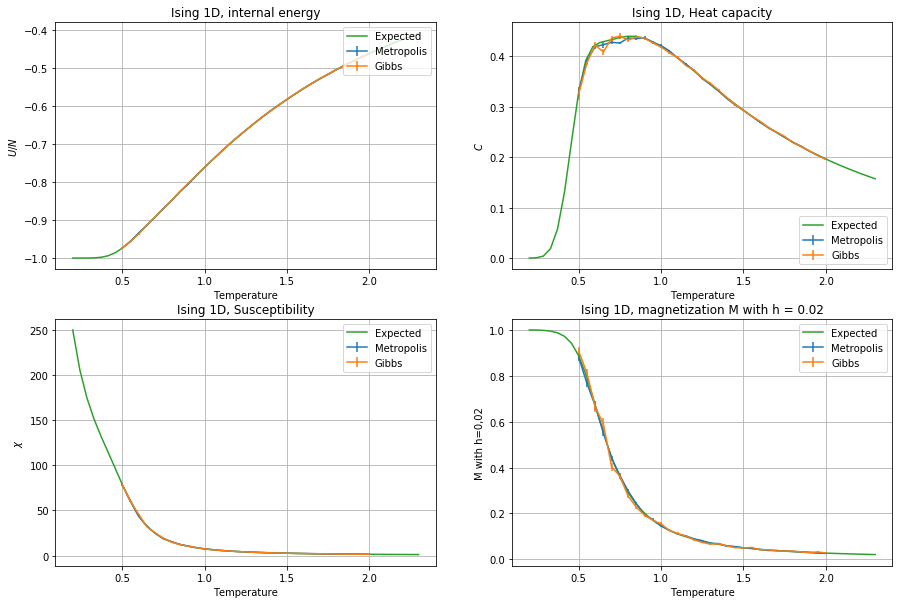

In [3]:
import numpy as np
import matplotlib.pyplot as plt

points=50
T = np.linspace(0.2,2.3,num=50)
b = 1/T
J = 1.0
Ns = 50
h=0.02
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

plt.figure(0,figsize=(15,10))

plt.subplot(221)
x,UM,errUM=np.loadtxt("es6/Metropolis/output.ene.0", usecols=(0,2,3), delimiter=" ", unpack='true')
UG,errUG=np.loadtxt("es6/Gibbs/output.ene.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.errorbar(x,UM,yerr=errUM,label='Metropolis')
plt.errorbar(x,UG,yerr=errUG,label='Gibbs')
e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e,label='Expected')
plt.xlabel('Temperature')
plt.ylabel(r'$U/N$')
plt.title('Ising 1D, internal energy')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(222)
HCM,errHCM=np.loadtxt("es6/Metropolis/output.heatcp.0", usecols=(2,3), delimiter=" ", unpack='true')
HCG,errHCG=np.loadtxt("es6/Gibbs/output.heatcp.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.errorbar(x,HCM,yerr=errHCM,label='Metropolis')
plt.errorbar(x,HCG,yerr=errHCG,label='Gibbs')
heat=((b*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
plt.plot(T, heat,label='Expected')
plt.xlabel('Temperature')
plt.ylabel(r'$C$')
plt.title('Ising 1D, Heat capacity')
plt.legend(loc='lower right')
plt.grid(True)

plt.subplot(223)
XM,errXM=np.loadtxt("es6/Metropolis/output.chi.0", usecols=(2,3), delimiter=" ", unpack='true')
XG,errXG=np.loadtxt("es6/Gibbs/output.chi.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.errorbar(x,XM,yerr=errXM,label='Metropolis')
plt.errorbar(x,XG,yerr=errXG,label='Gibbs')
X = b*np.exp(2*b*J)*(1-thN)/(1+thN)
plt.plot(T, X,label='Expected')
plt.xlabel('Temperature')
plt.ylabel(r'$\chi$')
plt.title('Ising 1D, Susceptibility')
plt.legend(loc='upper right')
plt.grid(True)

plt.subplot(224)
MM,errMM=np.loadtxt("es6/Metropolis/output.mag.0", usecols=(2,3), delimiter=" ", unpack='true')
MG,errMG=np.loadtxt("es6/Gibbs/output.mag.0", usecols=(2,3), delimiter=" ", unpack='true')
plt.errorbar(x,MM,yerr=errMM,label='Metropolis')
plt.errorbar(x,MG,yerr=errMG,label='Gibbs')
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
plt.plot(T, M,label='Expected')
plt.xlabel('Temperature')
plt.ylabel(r'M with h=0,02')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()